In [22]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import multiprocessing as mp
import copy
#

In [23]:
print( mp.cpu_count())

12


In [27]:
def interpolate_zCAM_to_zERA(pmid_zCAM, a_zERA, ps_ERA, start, stop):
    """
    Interpolate a portion of the data from zCAM to zERA.
    """
    for i in range(start, stop):
        for c in range(ncol):
            zoo = np.where(pmid_zCAM[i, :, c] > ps_ERA[i, c])
            lzoo = len(zoo[0])
            for z in range(lzoo):
                a_zCAMf[i, zoo[0][z], c] = a_zERA[i, nzE-1, c]

def interpolate_all_data(pmid_zCAM, a_zERA, ps_ERA, num_workers):
    """
    Interpolate all data from zCAM to zERA in parallel.
    """
    nt, nzE, ncol = np.shape(a_zERA)
    nt, nz, ncol = np.shape(a_zCAM)
    chunk_size = nt // num_workers
    chunks = [(pmid_zCAM, a_zERA, ps_ERA, i*chunk_size, (i+1)*chunk_size) for i in range(num_workers-1)]
    chunks.append((pmid_zCAM, a_zERA, ps_ERA, (num_workers-1)*chunk_size, nt))
    with multiprocessing.Pool(num_workers) as pool:
        pool.starmap(interpolate_zCAM_to_zERA, chunks)

        
def BottomFill( a_zCAM, a_zERA, pmid_zCAM, ps_ERA):
        
    a_zCAMf=copy.deepcopy( a_zCAM )
    nt,nzE,ncol = np.shape( a_zERA )
    nt,nz, ncol = np.shape( a_zCAM )
    for i in np.arange( nt ):
        for c in np.arange( ncol ):
            zoo=np.where( pmid_zCAM[i,:,c] > ps_ERA[i,c] )
            lzoo=len( zoo )
            for z in np.arange( start=0, stop=lzoo, step=1 ):
                a_zCAMf[i,zoo[z],c] = a_zERA[i,nzE-1,c]
                
    return a_zCAMf

In [48]:
# Example usage

plev=np.linspace(0,100_000.,num=100)
x=np.linspace( -100,100,num=101 )
y=np.linspace( -100,100,num=101 )

X,Y=np.meshgrid( x, y)
R=20.
psf=100_000. - 10_000*np.exp( -(X**2+Y**2)/(R**2) ) #.reshape(1,nx*ny)

nz=len(plev)
ny,nx=np.shape( psf )
pmid_zCAM = np.zeros((1, nz,ny,nx) )

for ix in np.arange(nx):
    for iy in np.arange(ny):
        pmid_zCAM[0,:,iy,ix]=plev

print(np.shape(pmid_zCAM) )

        
a_zCAM=pmid_zCAM.reshape(1,nz,ny*nx )
a_zERA=pmid_zCAM.reshape(1,nz,ny*nx )
pmid_zCAM=pmid_zCAM.reshape(1,nz,ny*nx )

psf=psf.reshape( 1, ny*nx )
print(np.shape(a_zERA) )

#pmid_zCAM = np.random.rand(100, 20, 10)
#a_zERA = np.random.rand(100, 30, 10)
#ps_ERA = np.random.rand(100, 10)
#a_zCAMf = np.zeros((100, 20, 10))

(1, 100, 101, 101)
(1, 100, 10201)


In [49]:
#
a_zCAM=BottomFill(  a_zCAM=a_zCAM, a_zERA=a_zERA, pmid_zCAM=pmid_zCAM, ps_ERA=psf )
a_zCAM=a_zCAM.reshape(1,nz,ny,nx )
a_zERA=a_zERA.reshape(1,nz,ny,nx )
pmid_zCAM=pmid_zCAM.reshape(1,nz,ny,nx )


In [50]:
print(np.shape(a_zERA) )

(1, 100, 101, 101)


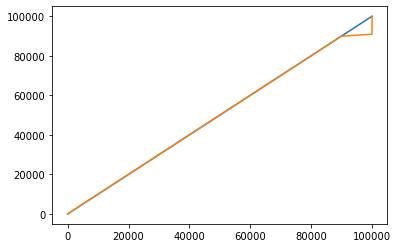

In [51]:

plt.plot( a_zERA[0,:,50,50],plev)
plt.plot( a_zCAM[0,:,50,50],plev)

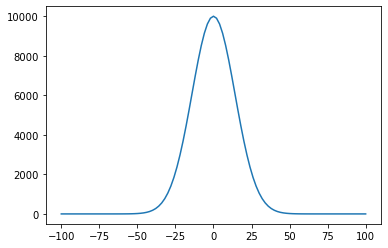

In [18]:
plt.plot(y,psf[:,50])
#plt.contourf(psf,levels=30)
#plt.colorbar()

In [4]:
num_workers = 4

interpolate_all_data(pmid_zCAM, a_zERA, ps_ERA, num_workers)
print(a_zCAMf)

NameError: name 'a_zCAM' is not defined